<hr>
<p style="text-align:left;">
    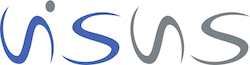
    <span style="float:right;">
        University of Stuttgart<br />Visualization Research Center
    </span>
</p>
<hr>
<p style="text-align:left;">
    <span style="float:left;">
        Prof. Daniel Weiskopf
    </span>
    <span style="float:right;">
        Sunday, 2024-12-08
    </span>
</p>
<br/>

# Theoretical and Methodological Foundations of Visual Computing
## Assignment 08
Responsible tutor: Daniel Klötzl
<br/>

> *Please submit your solution to ILIAS by <b>Sunday, 2024-12-15, 23:55</b>. <br /> Solutions will be discussed in the tutorial on <b>Thursday, 2024-12-19</b>.* <br /> *Please note that source code will only be accepted if it compiles.*
<hr>

**Student name(s):** <font color='green'>Guangxin Zhao</font> <br />
**Immatriculation number(s):** <font color='green'>st194136</font> <br />

<hr>

### Exercise 8.1 (6 points)
Given a grid with nodes $x_i=i\cdot\Delta x$, $y_j=j\cdot\Delta y$ with $\Delta x = \Delta y = 2$ and $i,j \in \{0,1,2,3\}$. The corresponding scalar values are shown in the following Figure.

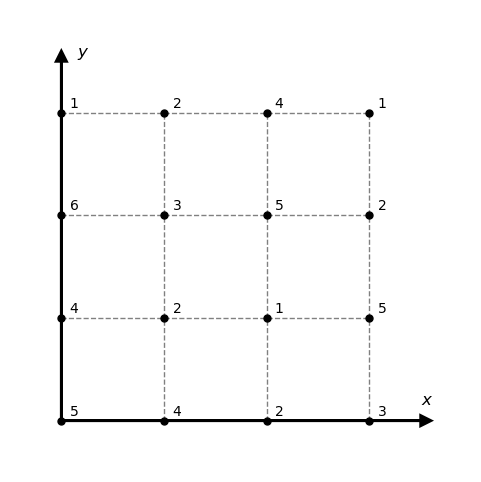

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 6))

ax.set_xlim(-1, 8)
ax.set_ylim(-1, 8)

ax.text(7, 0.25, '$x$', fontsize=12, va='bottom')
ax.text(0.3, 7.3, '$y$', fontsize=12, va='top')

# Given coordinate values
x_coords = [0, 2, 4, 6]
y_coords = [0, 2, 4, 6]
values = np.array([
    [5, 4, 2, 3],
    [4, 2, 1, 5],
    [6, 3, 5, 2],
    [1, 2, 4, 1],
])

for x in x_coords[1:]:
    ax.plot([x, x], [y_coords[0], y_coords[-1]], color='gray', linestyle='--', linewidth=1)
for y in y_coords[1:]:
    ax.plot([x_coords[0], x_coords[-1]], [y, y], color='gray', linestyle='--', linewidth=1)
ax.set_aspect('equal', adjustable='box')
for i, x in enumerate(x_coords):
    for j, y in enumerate(y_coords):
        # Draw the points
        ax.plot(x, y, 'o', color='black', markersize=5)
        # Annotate the values
        ax.text(x + 0.15, y+0.1, f'${values[j, i]}$', fontsize=10)

ax.arrow(0, 0, 7, 0, head_width=0.2, head_length=0.2, fc='black', ec='black', linewidth=2)
ax.arrow(0, 0, 0, 7, head_width=0.2, head_length=0.2, fc='black', ec='black', linewidth=2)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

plt.show()



`(a)` Write a Python script that does bilinear and bicubic interpolation on the domain $$\{ (x,y) \in \mathbb{R}^2 \, | \, 0 \leq x \leq 3,  0 \leq y \leq 3\}.$$ In case of bicubic interpolation, compute the derivatives using finite differences (central)  and use mirror padding at the boundaries. 

Plot your results using a suitable color map.

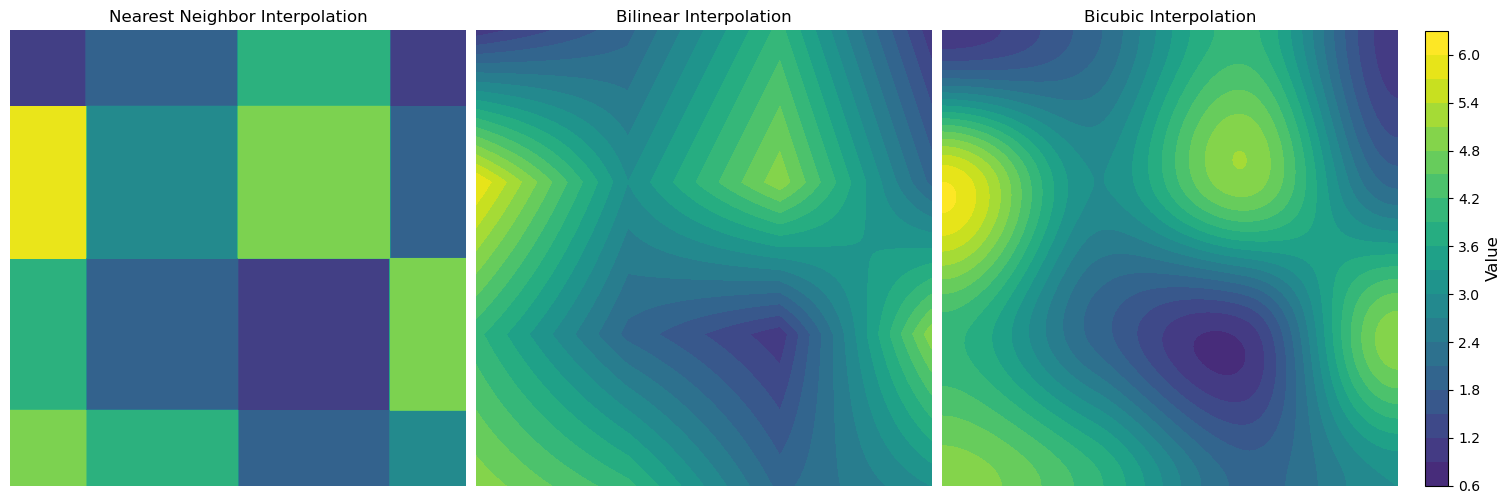

In [2]:
import numpy as np
import matplotlib.pyplot as plt

values = np.array([
    [5, 4, 2, 3],
    [4, 2, 1, 5],
    [6, 3, 5, 2],
    [1, 2, 4, 1]
])

A_inv = np.array([
    [1, 0, 0, 0,    0, 0, 0, 0,    0, 0, 0, 0,    0, 0, 0, 0],
    [0, 0, 0, 0,    1, 0, 0, 0,    0, 0, 0, 0,    0, 0, 0, 0],
    [-3, 3, 0, 0,  -2, -1, 0, 0,   0, 0, 0, 0,    0, 0, 0, 0],
    [2, -2, 0, 0,   1, 1, 0, 0,    0, 0, 0, 0,    0, 0, 0, 0],
    [0, 0, 0, 0,    0, 0, 0, 0,    1, 0, 0, 0,    0, 0, 0, 0],
    [0, 0, 0, 0,    0, 0, 0, 0,    0, 0, 0, 0,    1, 0, 0, 0],
    [0, 0, 0, 0,    0, 0, 0, 0,   -3, 3, 0, 0,   -2, -1, 0, 0],
    [0, 0, 0, 0,    0, 0, 0, 0,    2, -2, 0, 0,   1, 1, 0, 0],
    [-3, 0, 3, 0,   0, 0, 0, 0,   -2, 0, -1, 0,   0, 0, 0, 0],
    [0, 0, 0, 0,   -3, 0, 3, 0,    0, 0, 0, 0,   -2, 0, -1, 0],
    [9, -9, -9, 9,  6, 3, -6, -3,  6, -6, 3, -3,  4, 2, 2, 1],
    [-6, 6, 6, -6, -3, -3, 3, 3,  -4, 4, -2, 2,  -2, -2, -1, -1],
    [2, 0, -2, 0,   0, 0, 0, 0,    1, 0, 1, 0,    0, 0, 0, 0],
    [0, 0, 0, 0,    2, 0, -2, 0,   0, 0, 0, 0,    1, 0, 1, 0],
    [-6, 6, 6, -6, -4, -2, 4, 2,  -3, 3, -3, 3,  -2, -1, -2, -1],
    [4, -4, -4, 4,  2, 2, -2, -2,  2, -2, 2, -2,  1, 1, 1, 1]
])

x0, y0, x1, y1 = None, None, None, None
alpha = np.zeros((4, 4))

def nearest_neighbor_interpolation(x, y, values):
    x = int(np.round(x))
    y = int(np.round(y))

    return values[y, x]

def bilinear_interpolation(x, y, values):
    x0 = int(np.floor(x))
    y0 = int(np.floor(y))
    x1 = min(x0 + 1, values.shape[1] - 1)
    y1 = min(y0 + 1, values.shape[0] - 1)

    return (values[y0, x0] * (x1 - x) * (y1 - y) +
            values[y0, x1] * (x - x0) * (y1 - y) +
            values[y1, x0] * (x1 - x) * (y - y0) +
            values[y1, x1] * (x - x0) * (y - y0))

def derivatives(values):
    h = 1

    padded_values = np.pad(values, pad_width=1, mode='reflect')

    fx = (padded_values[1:-1, 2:] - padded_values[1:-1, :-2]) / (2 * h)
    fy = (padded_values[2:, 1:-1] - padded_values[:-2, 1:-1]) / (2 * h)
    fxy = (
        padded_values[2:, 2:] - padded_values[2:, :-2] - 
        padded_values[:-2, 2:] + padded_values[:-2, :-2]
    ) / (4 * h**2)

    return fx, fy, fxy

def bicubic_interpolation(x, y, values, derivatives):
    global alpha, x0, y0, x1, y1
    new_x0 = int(np.floor(x))
    new_y0 = int(np.floor(y))
    new_x1 = min(new_x0 + 1, values.shape[1] - 1)
    new_y1 = min(new_y0 + 1, values.shape[0] - 1)
    fx, fy, fxy = derivatives

    if new_x0 == x0 and new_y0 == y0 and new_x1 == x1 and new_y1 == y1:
        pass
    else:
        z = np.array([[
            values[new_y0, new_x0], values[new_y0, new_x1], values[new_y1, new_x0], values[new_y1, new_x1],
            fx[new_y0, new_x0],     fx[new_y0, new_x1],     fx[new_y1, new_x0],     fx[new_y1, new_x1],
            fy[new_y0, new_x0],     fy[new_y0, new_x1],     fy[new_y1, new_x0],     fy[new_y1, new_x1],
            fxy[new_y0, new_x0],    fxy[new_y0, new_x1],    fxy[new_y1, new_x0],    fxy[new_y1, new_x1]
        ]]).T

        alpha = A_inv @ z
        alpha = alpha.reshape((4, 4))
        alpha = alpha.T

        x0, y0, x1, y1 = new_x0, new_y0, new_x1, new_y1

    result = bicubic_interpolation_eval(x, y, alpha, new_x0, new_y0)

    return result

def bicubic_interpolation_eval(x, y, alpha, x0, y0):
    x = x - x0
    y = y - y0

    return sum(alpha[i, j] * x**i * y**j for i in range(4) for j in range(4))

x_values = np.linspace(0, 3, 1000)
y_values = np.linspace(0, 3, 1000)
X, Y = np.meshgrid(x_values, y_values)

bicubic_derivatives = derivatives(values)

Z_nearest = np.array([[nearest_neighbor_interpolation(x, y, values) for x in x_values] for y in y_values])
Z_bilinear = np.array([[bilinear_interpolation(x, y, values) for x in x_values] for y in y_values])
Z_bicubic = np.array([[bicubic_interpolation(x, y, values, bicubic_derivatives) for x in x_values] for y in y_values])

fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
vmin = min(Z_nearest.min(), Z_bilinear.min(), Z_bicubic.min())
vmax = max(Z_nearest.max(), Z_bilinear.max(), Z_bicubic.max())

methods = [("Nearest Neighbor", Z_nearest), ("Bilinear", Z_bilinear), ("Bicubic", Z_bicubic)]
for ax, (title, Z) in zip(axes, methods):
    im = ax.contourf(X, Y, Z, levels=20, cmap='viridis', vmin=vmin, vmax=vmax)
    ax.set_title(f"{title} Interpolation", fontsize=12)
    ax.set_aspect('equal')
    ax.axis('off')

cbar = fig.colorbar(im, ax=axes, location='right', shrink=0.94, pad=0.02)
cbar.set_label("Value", fontsize=12)

plt.show()

<hr>

### Exercise 8.2 (8 points)

Given the three functions: 
\begin{align*}
    &\text{Runge function}  &f(x) &= \frac{1}{1+x^2} & \text{with } &x\in[-5,5], \\
    &\text{Sine function}  &g(x) &= \sin(x) & \text{with } &x\in[0,2\,\pi], \\
    &\text{Lennard-Jones function} &h(x) &= x^{-12} - x^{-6} & \text{with } &x\in[1,5].
\end{align*}


`(a)` Implement Newton interpolation in Python to reconstruct each function out of $N$ equidistant sample points, where $N \in \{5,10,15\}$. Provide a plot for each function showing the reconstructed function versus the analytical solution. Comment on the result. 

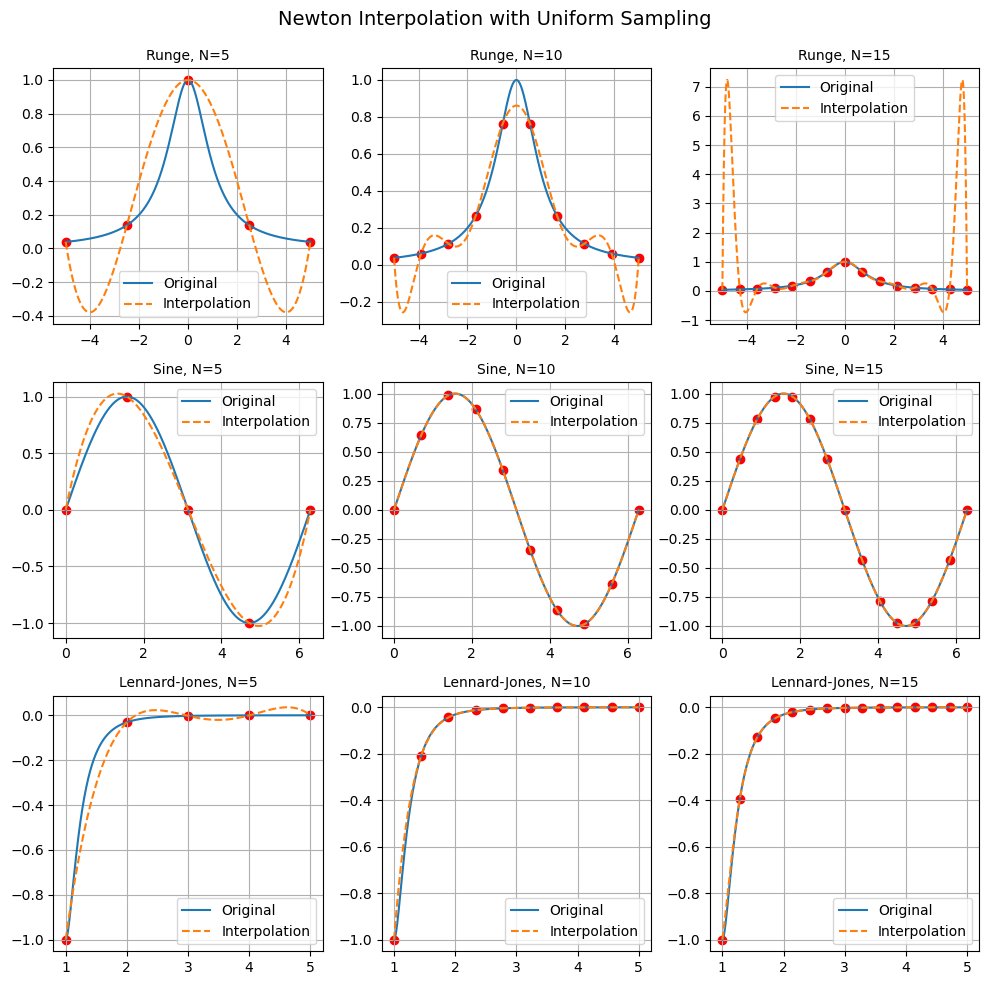

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def runge(x):
    return 1 / (1 + x**2)

def sine(x):
    return np.sin(x)

def lennard_jones(x):
    return 1 / x**12 - 2 / x**6

runge_range = [-5, 5]
sine_range = [0, 2 * np.pi]
lennard_jones_range = [1, 5]

N = [5, 10, 15]

def newton_interpolation(x, y):
    length = len(x)
    c = y.copy()

    for k in range(1, length):
        for i in range(length - 1, k - 1, -1):
            c[i] = (c[i] - c[i - 1]) / (x[i] - x[i - k])

    return c

def newton_interpolation_eval(x_samples, c, x):
    length = len(x_samples)
    y = np.zeros_like(x)

    for i in range(length):
        p = c[i]
        for j in range(i):
            p *= (x - x_samples[j])
        y += p
        
    return y

def uniform_sampling(f, f_range, N):
    x = np.linspace(f_range[0], f_range[1], N)

    return x, f(x)

def plot_interpolation(f, f_range, N, fig_index, func_name):
    x = np.linspace(f_range[0], f_range[1], 1000)
    y = f(x)

    x_samples, y_samples = uniform_sampling(f, f_range, N)

    c = newton_interpolation(x_samples, y_samples)

    y_interpolated = newton_interpolation_eval(x_samples, c, x)

    plt.subplot(3, 3, fig_index)
    plt.plot(x, y, label='Original')
    plt.plot(x, y_interpolated, '--', label='Interpolation')
    plt.scatter(x_samples, y_samples, color='red')
    plt.title(f"{func_name}, N={N}", fontsize=10)
    plt.legend()
    plt.grid()

plt.figure(figsize=(10, 10))
plt.suptitle("Newton Interpolation with Uniform Sampling", fontsize=14)

for i in range(len(N)):
    plot_interpolation(runge, runge_range, N[i], i + 1, "Runge")
    plot_interpolation(sine, sine_range, N[i], i + 4, "Sine")
    plot_interpolation(lennard_jones, lennard_jones_range, N[i], i + 7, "Lennard-Jones")

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

**Comment:**

Newton interpolation performs well on the Sine function and the Lennard-Jones function. However, it performs poorly on the Runge function, especially with a large number of sample points. It performs severe oscillations near the edges of the interval. This is known as the [**Runge's phenomenon**](https://en.wikipedia.org/wiki/Runge%27s_phenomenon). 

`(b)` To improve the interpolation results, [**Chebyshev polynomials**](https://en.wikipedia.org/wiki/Chebyshev\_polynomials) can be used to obtain a better approximation of the sample points positions:
\begin{equation*}
	x_\text{k} = \frac{a+b}{2} + \frac{b-a}{2} \cdot\text{cos}\left( \frac{2\cdot k + 1}{2\,n} \cdot\pi \right) \quad \text{with} \quad k = 0, 1, ..., n-1.
\end{equation*}
Extend the implementation to generate the sample points using Chebyshev polynomials, where $a$ and $b$ are the boundaries of the function interval. Compare the results against `(a)`. 	

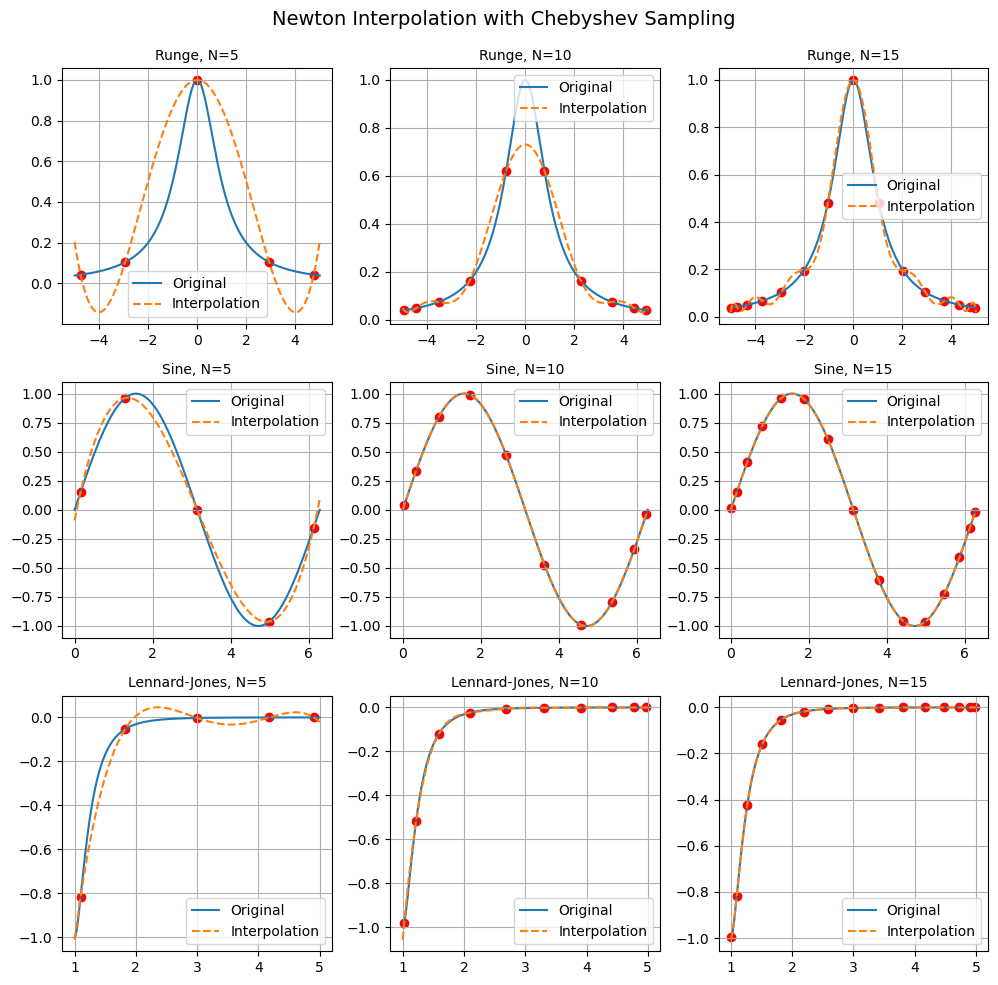

In [4]:
def chebyschev_sampling(f, f_range, N):
    a, b = f_range[0], f_range[1]

    x = np.zeros(N)
    for i in range(N):
        x[i] = (a + b) / 2 + (b - a) / 2 * np.cos((2 * i + 1) * np.pi / (2 * N))

    return x, f(x)

def plot_chebyshev_interpolation(f, f_range, N, fig_index, func_name):
    x = np.linspace(f_range[0], f_range[1], 1000)
    y = f(x)

    x_samples, y_samples = chebyschev_sampling(f, f_range, N)

    c = newton_interpolation(x_samples, y_samples)

    y_interpolated = newton_interpolation_eval(x_samples, c, x)

    plt.subplot(3, 3, fig_index)
    plt.plot(x, y, label='Original')
    plt.plot(x, y_interpolated, '--', label='Interpolation')
    plt.scatter(x_samples, y_samples, color='red')
    plt.title(f"{func_name}, N={N}", fontsize=10)
    plt.legend()
    plt.grid()

plt.figure(figsize=(10, 10))
plt.suptitle("Newton Interpolation with Chebyshev Sampling", fontsize=14)

for i in range(len(N)):
    plot_chebyshev_interpolation(runge, runge_range, N[i], i + 1, "Runge")
    plot_chebyshev_interpolation(sine, sine_range, N[i], i + 4, "Sine")
    plot_chebyshev_interpolation(lennard_jones, lennard_jones_range, N[i], i + 7, "Lennard-Jones")

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

**Comment:**

Using Chebyshev polynomials for sampling significantly reduces oscillations near the edges of the interval. As a result, the Runge function is much better approximated compared to Uniform sampling.

<hr>

### Exercise 8.3 (6 points)

Given a set of sample points $S=\{\vec{q_i} \in \Omega,i=1…4\}, \Omega\subset{\mathbb{R}}^2$.

`(a)` Roughly sketch the Voronoi decomposition and shade the regions accordingly. Based on this, construct the Delaunay triangulation from the Voronoi decomposition.

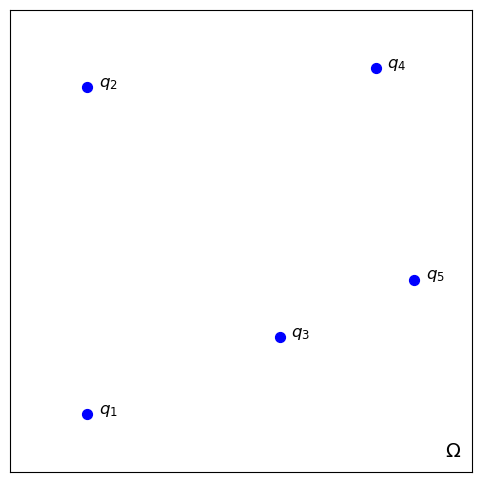

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = (1,1,6,8.5,9.5)
y = (.5,9,2.5,9.5,4)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x, y, color='blue', s=50, label='Random Points')

for i, (xi, yi) in enumerate(zip(x, y)):
    ax.text(xi + 0.3, yi, f'$q_{{{i+1}}}$', fontsize=12, color='black')

ax.text(10.5, -0.6, r'$\Omega$', fontsize=14, ha='center')

ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)
ax.set_aspect('equal', adjustable='box')

ax.set_xticks([])
ax.set_yticks([])

plt.show()

**Answer:**

The Voronoi decomposition with shaded regions and the corresponding Delaunay triangulation are shown below:

<p align="center" style="margin: 0;">
    <img src="8_3_a.jpeg" alt="Voronoi Decomposition and Delaunay Triangulation" style="width: 35%;">
  </p>

`(b)` Given the following triangulations of a set of sample points, which of the triangulations is a Delaunay triangulation? Provide a short explanation.
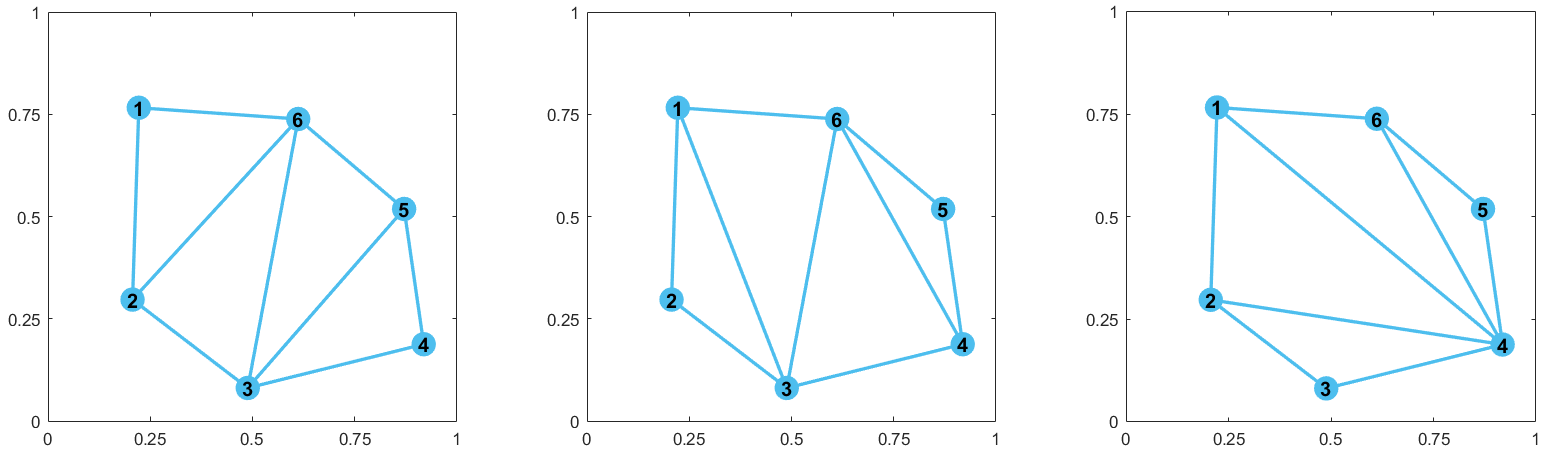


**Answer:**

- The first triangulation is a Delaunay triangulation.
- The second triangulation is not a Delaunay triangulation because the edge between points 3 and 6 creates a triangle whose circumcircle contains point 5, violating the Delaunay condition.
- The third triangulation is not a Delaunay triangulation because the edge between points 1 and 4 creates a triangle whose circumcircle contains point 5, violating the Delaunay condition.

<hr>

### Bonus-Exercise 8.4 (4 points)

Given $P_i(x,y,d)$ with $i \in \{1,2,3,4,5,6\}$ in the Figure below, interpolate the points $P_7$ and $P_8$ via **Shepard interpolation** considering neighbors within radius 3 and using exponent $p=2$ in the basis functions. For each interpolation specify the distances to all considered points and provide the evaluated basis functions.

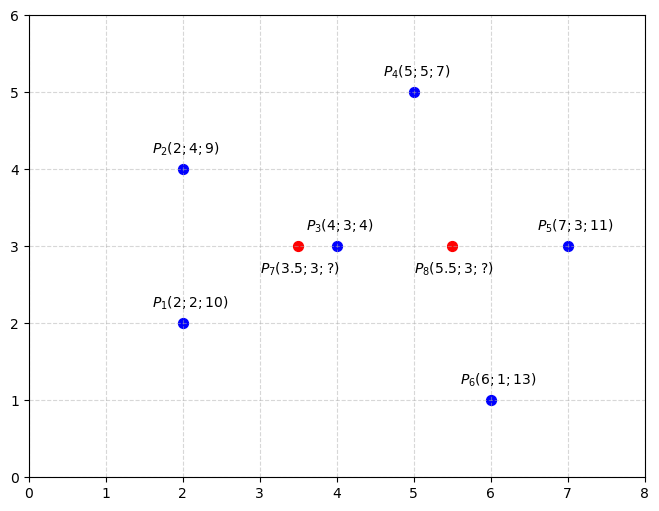

In [6]:
import matplotlib.pyplot as plt

# Points from the plot
points = {
    "P_1(2;2;10)": (2, 2, 10),
    "P_2(2;4;9)": (2, 4, 9),
    "P_3(4;3;4)": (4, 3, 4),
    "P_4(5;5;7)": (5, 5, 7),
    "P_5(7;3;11)": (7, 3, 11),
    "P_6(6;1;13)": (6, 1, 13),
    "P_7(3.5;3;?)": (3.5, 3, None),  # Value unknown
    "P_8(5.5;3;?)": (5.5, 3, None),  # Value unknown
}

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

for label, (x, y, value) in points.items():
    # Annotate the point
    annotation = f"${label}$"
    if value is None:
        ax.scatter(x, y, color="red", s=50)
        ax.text(x - 0.5, y - 0.35, annotation, fontsize=10)
    else:
        ax.scatter(x, y, color="blue", s=50)
        ax.text(x - 0.4, y + 0.2, annotation, fontsize=10)
    

ax.grid(visible=True, linestyle="--", alpha=0.5)
ax.set_xlim(0, 8)
ax.set_ylim(0, 6)
ax.set_xticks(range(9))
ax.set_yticks(range(7))
ax.set_aspect('equal', adjustable='box')

plt.show()


Interpolating for P_7(3.5;3;?)
Neighbor: (2, 2, 10.00), Distance: 1.80, Weight: 0.064433
Neighbor: (2, 4, 9.00), Distance: 1.80, Weight: 0.064433
Neighbor: (4, 3, 4.00), Distance: 0.50, Weight: 0.837629
Neighbor: (5, 5, 7.00), Distance: 2.50, Weight: 0.033505

Interpolating for P_8(5.5;3;?)
Neighbor: (4, 3, 4.00), Distance: 1.50, Weight: 0.276142
Neighbor: (5, 5, 7.00), Distance: 2.06, Weight: 0.146193
Neighbor: (7, 3, 11.00), Distance: 1.50, Weight: 0.276142
Neighbor: (6, 1, 13.00), Distance: 2.06, Weight: 0.146193
Neighbor: (3.5, 3, 4.81), Distance: 2.00, Weight: 0.155330


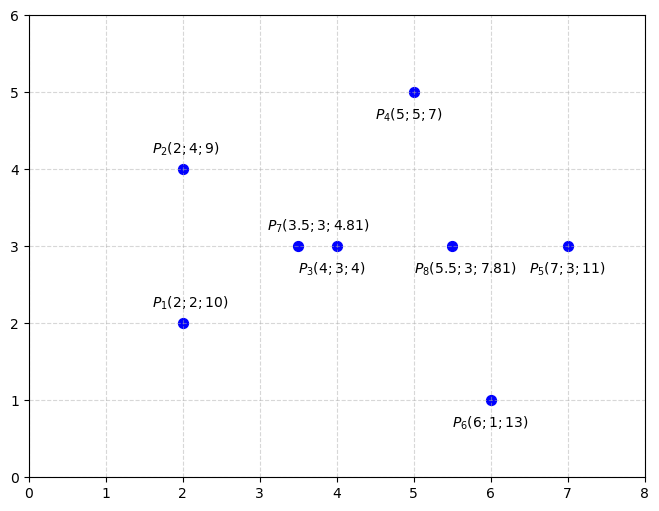

In [7]:
points = {
    "P_1(2;2;10)": (2, 2, 10),
    "P_2(2;4;9)": (2, 4, 9),
    "P_3(4;3;4)": (4, 3, 4),
    "P_4(5;5;7)": (5, 5, 7),
    "P_5(7;3;11)": (7, 3, 11),
    "P_6(6;1;13)": (6, 1, 13),
    "P_7(3.5;3;?)": (3.5, 3, None),  # Value unknown
    "P_8(5.5;3;?)": (5.5, 3, None),  # Value unknown
}

mu = 2

def check_neighbors(x, y, points):
    neighbors = []

    for xi, yi, zi in points:
        if zi == None:
            continue

        dist = np.sqrt((x - xi)**2 + (y - yi)**2)
        if dist <= 3:
            neighbors.append((xi, yi, zi, dist))
    return neighbors

def shepard_interpolation(x, y, points, mu):
    neighbors = check_neighbors(x, y, points)
    numerator = 0
    denominator = 0
    weights = []

    for xi, yi, zi, dist in neighbors:
        weight = 1 / dist**mu
        weights.append(weight)
        numerator += zi * weight
        denominator += weight

    for i, (xi, yi, zi, dist) in enumerate(neighbors):
        print(f"Neighbor: ({xi}, {yi}, {zi:.2f}), Distance: {dist:.2f}, Weight: {weights[i]/denominator:.6f}")

    return numerator / denominator

new_items = {}

interpolate_points = [k for k, v in points.items() if v[2] is None]

for key in interpolate_points:
    x, y, _ = points[key]

    print(f"\nInterpolating for {key}")
    z = shepard_interpolation(x, y, list(points.values()), mu)

    points.pop(key)
    new_key = key.replace("?", f"{z:.2f}")
    points[new_key] = (x, y, z)

fig, ax = plt.subplots(figsize=(8, 6))

for label, (x, y, value) in points.items():
    if x >= 4:
        offset_x, offset_y = -0.5, -0.35
    else:
        offset_x, offset_y = -0.4, 0.2

    annotation = f"${label}$"
    ax.scatter(x, y, color="blue", s=50)
    ax.text(x + offset_x, y + offset_y, annotation, fontsize=10)

ax.grid(visible=True, linestyle="--", alpha=0.5)
ax.set_xlim(0, 8)
ax.set_ylim(0, 6)
ax.set_xticks(range(9))
ax.set_yticks(range(7))
ax.set_aspect('equal', adjustable='box')

plt.show()

<hr>

<div class="alert alert-success">

### Guidelines for Submission

Do not forget to update the student name(s) and matriculation number(s). 

**Text-based Responses**

For text-based questions, a markdown cell with the placeholder `Cell left blank for student response` will usually follow the question. Ensure that text responses are either entered in markdown cells using plain text and LaTeX or via the import of PDFs or PNG files (e.g. via `![ExampleFileName](example_file.png)` for handwritten solutions). If external files are used in your Jupyter Notebook, make sure to include all data in a zipped folder uploaded to Ilias.

**Code-based Responses**

For questions that involve Python coding, you'll typically find a code cell with the placeholder `# YOUR CODE HERE`.

#### Submission Process

To ensure your notebook runs smoothly from start to finish, select "Restart & Run All" from the "Kernel" menu before submitting.

When ready to submit, upload your `.ipynb` file (or a zipped folder containing the `.ipynb` file as well as all auxiliary files, e.g. imported .pdf or .jpg files) to Ilias.

</div>